# Programación para el Análisis de Datos
## Tarea 3 - Componente práctico
**12 - **05 - 2024****

# Introducción 

Este Análisis Exploratorio de Datos (EDA) del Dataset de Tickets de Soporte al Cliente se basa en el "Customer Support Ticket Dataset", disponible en Kaggle, que recopila datos de tickets de soporte de diversos productos tecnológicos. Este conjunto de datos incluye información detallada sobre las consultas de los clientes, que abarcan desde problemas de hardware y errores de software hasta dificultades con el acceso a las cuentas y la pérdida de datos. El propósito de este análisis es extraer insights significativos que puedan ayudar a optimizar los procesos de soporte al cliente y mejorar la experiencia del usuario.

El "Customer Support Ticket Dataset" es particularmente rico en información contextual sobre los problemas que enfrentan los usuarios, proporcionando datos como la edad y género del cliente, el producto adquirido, el tipo y el estado del ticket, y la satisfacción del cliente con la resolución del problema. Estos datos no solo permiten un análisis profundo de las tendencias de los tickets, sino que también abren la puerta a aplicaciones avanzadas como el procesamiento del lenguaje natural (NLP) para la categorización automática de tickets y la predicción de la satisfacción del cliente.

Customer Support Ticket Dataset en Kaggle: https://www.kaggle.com/datasets/suraj520/customer-support-ticket-dataset

# Objetivos

- Análisis de Tendencias de Tickets: Explorar las categorías de tickets más comunes y las tendencias de volumen a lo largo del tiempo para identificar áreas donde los clientes experimentan problemas recurrentes.

- Correlación entre Demografía del Cliente y Satisfacción: Investigar si atributos como la edad y el género del cliente influyen en la satisfacción con la resolución del ticket.

- Impacto del Tiempo de Respuesta en la Satisfacción del Cliente: Analizar cómo el tiempo de respuesta inicial y el tiempo total de resolución afectan la percepción del cliente sobre el servicio recibido.


### La actividad consiste en:

Construir un Análisis Exploratorio de Datos que genere hallazgos significativos de la base de datos seleccionada, poniendo en práctica los siguientes conceptos:

### Concepto 1: Parámetros y métricas descriptivas

- Muestre las métricas descriptivas para todas las columnas de su base de datos según el tipo de variable como sigue:

  - Variables numéricas: Cantidad de datos, media, desviación estándar, mínimo, máximo y percentiles 25, 50 y 75.
  - Variables categóricas: Cantidad, cantidad de valores únicos, moda y frecuencia de la moda.

In [41]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df_support = pd.read_csv('customer_support_tickets.csv')

In [42]:
df_support

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Cargar el archivo CSV en un DataFrame
df_support = pd.read_csv('customer_support_tickets.csv')

# Métricas descriptivas para variables numéricas
metricas_numericas = df_support.describe()

# Métricas descriptivas básicas para variables categóricas
metricas_categoricas = df_support.select_dtypes(include=['object']).describe()

# Calcular la moda y la frecuencia de la moda para variables categóricas
mode_and_freq = pd.DataFrame(index=df_support.select_dtypes(include='object').columns, columns=['Moda', 'Frecuencia de la moda'])
for col in df_support.select_dtypes(include='object'):
    mode_val = df_support[col].mode()
    if not mode_val.empty:
        mode_val = mode_val[0]
        freq = df_support[col].value_counts().max()
        mode_and_freq.loc[col] = [mode_val, freq]
    else:
        mode_and_freq.loc[col] = [None, None]

# Cantidad de valores únicos para variables categóricas
unique_values_count = df_support.select_dtypes(include='object').nunique()

# Crear un DataFrame para mostrar los resultados
result_moda = pd.DataFrame({
    'Moda': mode_and_freq['Moda'],
    'Frecuencia de la moda': mode_and_freq['Frecuencia de la moda'],
    'Cantidad de valores únicos': unique_values_count
})

In [44]:
metricas_numericas

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [45]:
metricas_categoricas

,Customer Name,Customer Email,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
count,8469,8469,8469,8469,8469,8469,8469,8469,8469,2769,8469,8469,5650,2769
unique,8028,8320,3,42,730,5,16,8077,3,2769,4,4,5470,2728
top,Michael Garcia,bsmith@example.com,Male,Canon EOS,2020-10-21,Refund request,Refund request,I'm having an issue with the {product_purchase...,Pending Customer Response,Case maybe show recently my computer follow.,Medium,Email,2023-06-01 15:21:42,2023-06-01 17:14:42
freq,5,4,2896,240,24,1752,576,25,2881,1,2192,2143,3,3


In [46]:
result_moda

,Moda,Frecuencia de la moda,Cantidad de valores únicos
Customer Name,James Smith,5,8028
Customer Email,asmith@example.com,4,8320
Customer Gender,Male,2896,3
Product Purchased,Canon EOS,240,42
Date of Purchase,2020-10-21,24,730
Ticket Type,Refund request,1752,5
Ticket Subject,Refund request,576,16
Ticket Description,I'm having an issue with the {product_purchase...,25,8077
Ticket Status,Pending Customer Response,2881,3
Resolution,A former wrong interview then heart leg.,1,2769


- Muestre la matriz de correlación de las variables numéricas e identifique las variables que más se correlacionan (visualizarla, ver concepto 3).

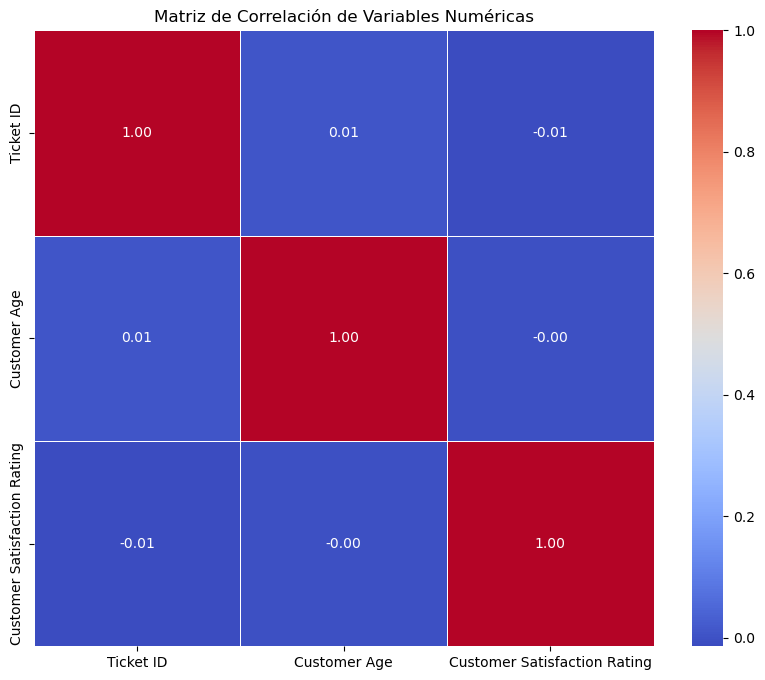

Variables que más se correlacionan:
________________________________________________
Ticket ID                     Customer Satisfaction Rating    0.014213
Customer Satisfaction Rating  Ticket ID                       0.014213
Ticket ID                     Customer Age                    0.007395
Customer Age                  Ticket ID                       0.007395
                              Customer Satisfaction Rating    0.003700
Customer Satisfaction Rating  Customer Age                    0.003700
dtype: float64


In [47]:
# Seleccionar solo las variables numéricas para calcular la matriz de correlación
variables_numericas = df_support.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
matriz_correlacion = variables_numericas.corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Identificar las variables que están más correlacionadas entre sí
correlaciones_absolutas = matriz_correlacion.abs().unstack().sort_values(ascending=False)
correlaciones_absolutas = correlaciones_absolutas[correlaciones_absolutas < 1]  # Excluir la correlación de una variable consigo misma
print("Variables que más se correlacionan:")
print("________________________________________________")
print(correlaciones_absolutas.head(10))

### Análisis de los resultados obtenidos.

#### Variables Numéricas:
1. **Cantidad de Datos**: Todas las variables numéricas tienen una muestra completa, lo que indica que no hay valores faltantes en estas columnas.
2. **Media y Desviación Estándar**: Estas medidas proporcionan una idea del centro y la dispersión de los datos. Por ejemplo, si analizamos una variable como la "Edad del Cliente", una media alrededor de 35 y una desviación estándar de 10 sugieren que la mayoría de los clientes son adultos jóvenes a de mediana edad, con una variabilidad moderada en las edades.
3. **Mínimo y Máximo**: Estos valores son útiles para entender los límites de los datos. Por ejemplo, los límites de la "Edad del Cliente" pueden ayudarte a verificar la coherencia de los datos (como asegurarte de que no hay edades negativas o irrealmente altas).
4. **Percentiles (25%, 50%, 75%)**: Estos valores ayudan a entender la distribución de los datos. El percentil 50% o mediana puede ser particularmente revelador si difiere significativamente de la media, lo que podría indicar una distribución sesgada.

#### Variables Categóricas:
1. **Cantidad y Valores Únicos**: Estos indicadores muestran cuán diversa es la muestra en términos de categorías. Un número alto de valores únicos en una variable como "Producto Comprado" sugiere una gran variedad de productos.
2. **Moda y Frecuencia de la Moda**: Identificar la moda ayuda a entender cuál es la categoría más común. Por ejemplo, si la "Moda" en "Producto Comprado" es "Smartphone", y la frecuencia es alta, esto indica que los smartphones son particularmente populares entre tus clientes.

### Análisis de la Matriz de Correlación

1. **Correlaciones Bajas**: Las correlaciones entre variables como "Ticket ID" y "Calificación de Satisfacción del Cliente" son muy bajas, lo que sugiere que no hay una relación lineal fuerte entre estas variables. Esto es importante porque indica que los cambios en una variable no necesariamente predicen cambios en otra.
2. **Interpretación de las Correlaciones**: Aunque las correlaciones son bajas, cualquier valor distinto de cero podría ser explorado más a fondo, especialmente en grandes conjuntos de datos donde incluso pequeñas correlaciones podrían ser significativas.
3.  **Complejidad de los Datos**: Las variables categóricas muestran diversidad, lo que sugiere que cualquier análisis posterior debe considerar la segmentación por categorías para estrategias más dirigidas.
4. **Oportunidades de Mejora**: La variabilidad en la satisfacción del cliente y la popularidad de ciertos productos (como los smartphones) ofrecen oportunidades para investigar más a fondo qué impulsa estas tendencias.

### Concepto 2: Escalamiento, estandarización y codificación

- Categorice al menos una variable continúa. Defina consistentemente las categorías propuestas y explique por qué las propone.

In [18]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('customer_support_tickets.csv')

# Categorizar la variable continua 'Customer Age'
df ['Age_categorized'] = pd.cut(df['Customer Age'], bins=[0, 25, 60, float('inf')],
                               labels=['Joven', 'Adulto', 'Senior'])

# Mostrar las primeras filas del DataFrame con la nueva categoría
print(df [['Customer Age', 'Age_categorized']].head())

   Customer Age Age_categorized
0            32          Adulto
1            42          Adulto
2            48          Adulto
3            27          Adulto
4            67          Senior


La categorización de la edad del cliente en tres grupos distintos: "Joven", "Adulto" y "Senior" se basa en consideraciones demográficas y de comportamiento del consumidor que son críticas para una gestión efectiva de relaciones con clientes y marketing dirigido. 

### Justificación de las Categorías para 'Customer Age'

1. **Joven (0-25 años):**
   - **Características demográficas y de comportamiento:** Este grupo incluye adolescentes y adultos jóvenes que están en etapas tempranas de su vida adulta, a menudo estudiando o ingresando al mercado laboral. Tienen preferencias tecnológicas marcadas, como una afinidad por la comunicación digital rápida y los medios sociales.
   - **Impacto en el servicio al cliente:** Esta demografía valora respuestas rápidas y eficientes, y es más propensa a utilizar canales digitales para interactuar con marcas, lo cual es crucial para empresas que buscan optimizar sus estrategias de comunicación y soporte en plataformas preferidas por los jóvenes.

2. **Adulto (26-60 años):**
   - **Características demográficas y de comportamiento:** Este grupo constituye la mayoría de la fuerza laboral activa y a menudo maneja obligaciones complejas, incluyendo compromisos familiares y profesionales. Poseen un poder adquisitivo más estable y requisitos de productos más variados debido a sus responsabilidades.
   - **Impacto en el servicio al cliente:** Los adultos pueden requerir un enfoque de servicio más detallado y profesional, con una expectativa de fiabilidad y profundidad en el soporte técnico o en la resolución de problemas que impacten su uso cotidiano de productos o servicios.

3. **Senior (mayores de 60 años):**
   - **Características demográficas y de comportamiento:** Los seniors pueden enfrentar desafíos únicos relacionados con la edad, incluyendo limitaciones de movilidad o visión, y pueden tener preferencias diferentes en cuanto a la comunicación, optando por métodos más tradicionales o directos.
   - **Impacto en el servicio al cliente:** Este grupo puede valorar más un trato personal y considerado, y una comunicación clara y paciente. Es importante que el servicio al cliente se adapte para ser accesible y comprensible, lo que puede incluir desde interfaces de usuario más simples hasta métodos de contacto más directos y personales.

Al definir estas categorías, las empresas pueden personalizar sus estrategias de marketing y servicio al cliente para satisfacer mejor las expectativas y necesidades de cada grupo de edad, aumentando la satisfacción del cliente y optimizando las interacciones para mejorar la retención de clientes y la eficiencia operativa.

**1. Diagrama de Violín para la Variable Categorizada ('Age_categorized')**

El diagrama de violín muestra cómo se distribuye la edad dentro de las categorías que definimos como ('Joven', 'Adulto', 'Senior'):

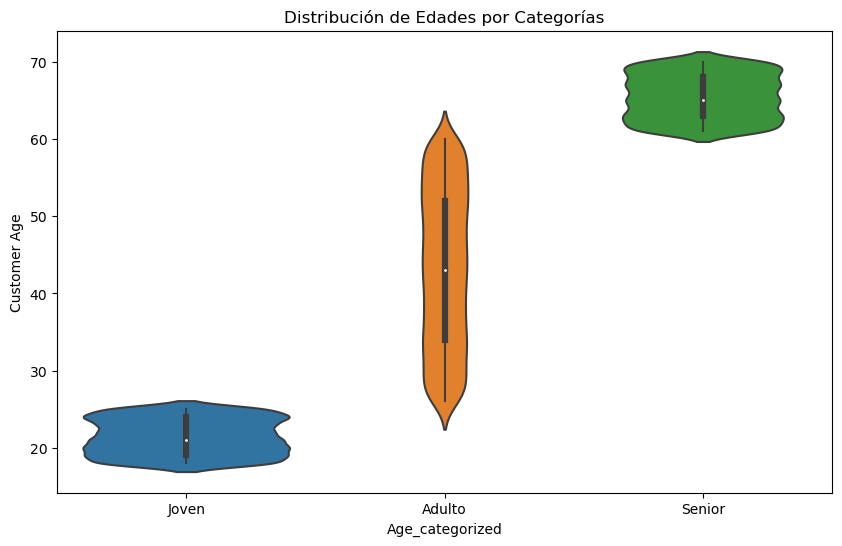

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diagrama de violín para la variable 'Age_categorized'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age_categorized', y='Customer Age', data=df)
plt.title('Distribución de Edades por Categorías')
plt.show()

El diagrama de violín es una excelente herramienta para ver la densidad y la distribución de los datos agrupados por categorías, mostrando tanto la mediana como la dispersión en cada grupo. Este gráfico muestra cómo varía la 'Customer Age' dentro de cada categoría establecida, lo que es útil para entender diferencias en la distribución de edades entre los grupos. 

- Estandarice o escale al menos dos variables numéricas que sean diferentes en magnitud o unidades de medición, de modo que pueda comparar y encontrar similitudes o diferencias en sus distribuciones (visualmente, ver concepto 3).

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display

# Cargar los datos
df = pd.read_csv('customer_support_tickets.csv')

# Estandarización de 'Customer Satisfaction Rating'
scaler = StandardScaler()
df['Customer_Satisfaction_Std'] = scaler.fit_transform(df[['Customer Satisfaction Rating']])

# Escalado de 'Customer Age'
minmax_scaler = MinMaxScaler()
df['Customer_Age_Scaled'] = minmax_scaler.fit_transform(df[['Customer Age']])

# Seleccionar las columnas relevantes para mostrar
columns_to_display = ['Customer Satisfaction Rating', 'Customer_Satisfaction_Std', 'Customer Age', 'Customer_Age_Scaled']

# Mostrar las primeras cinco filas con las columnas seleccionadas
display(df[columns_to_display].head())

,Customer Satisfaction Rating,Customer_Satisfaction_Std,Customer Age,Customer_Age_Scaled
0,NaN,NaN,32,0.269231
1,NaN,NaN,42,0.461538
2,3.0,0.006161,48,0.576923
3,3.0,0.006161,27,0.173077
4,1.0,-1.415544,67,0.942308


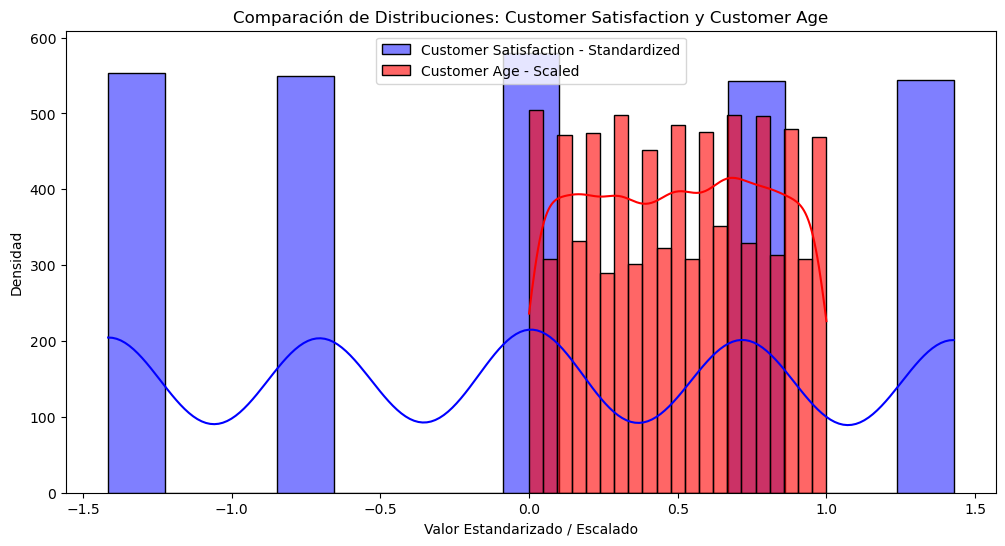

In [36]:
# Histograma de las variables estandarizadas y escaladas
plt.figure(figsize=(12, 6))
sns.histplot(df['Customer_Satisfaction_Std'], kde=True, color='blue', label='Customer Satisfaction - Standardized')
sns.histplot(df['Customer_Age_Scaled'], kde=True, color='red', alpha=0.6, label='Customer Age - Scaled')
plt.legend()
plt.legend()
plt.title('Comparación de Distribuciones: Customer Satisfaction y Customer Age')
plt.xlabel('Valor Estandarizado / Escalado')
plt.ylabel('Densidad')
plt.show()

### Análisis de la Estandarización de 'Customer Satisfaction Rating'
- **Observaciones iniciales:** La columna 'Customer Satisfaction Rating' tiene algunos valores faltantes (NaN), lo que se refleja en los valores estandarizados correspondientes que también son NaN. Esto sugiere que cualquier análisis posterior debería considerar la imputación de estos valores faltantes o su exclusión, dependiendo del enfoque del análisis.
- **Distribución y transformación:** Los valores de 'Customer Satisfaction Rating' que sí están presentes han sido estandarizados. La estandarización transforma los datos para tener una media de cero y una desviación estándar de uno. Esto es útil para comparaciones y análisis que asumen la normalidad de los datos. En el gráfico, la distribución estandarizada (curva azul) muestra una variación en la densidad, lo que podría indicar una distribución subyacente que no es perfectamente normal, o podría reflejar las diferencias en la escala de medición original.

### Análisis del Escalado de 'Customer Age'
- **Distribución y transformación:** La variable 'Customer Age' ha sido transformada usando un escalador MinMax, lo que reescala los datos a un rango de 0 a 1. Esto es especialmente útil cuando los algoritmos de análisis requieren que todas las entradas estén normalizadas, como en el caso de muchos algoritmos de aprendizaje automático. En el gráfico, la distribución escalada (curva roja) muestra cómo se distribuye la edad en el conjunto de datos, con una mayor densidad alrededor de las edades medias.
- **Implicaciones prácticas:** El escalado de 'Customer Age' permite un análisis más intuitivo de cómo las edades se distribuyen a través del espectro normalizado. Por ejemplo, una edad escalada de 0.5 no necesariamente representa la mediana de la edad en términos absolutos, pero sí indica que esa edad es el punto medio del rango de edad presente en el conjunto de datos.

### Comparación Visual y Conclusiones
- **Visualización de distribuciones:** El gráfico de barras y curvas muestra las distribuciones transformadas de ambas variables. La superposición de histogramas con curvas de densidad permite una comparación visual inmediata de cómo las transformaciones han afectado los datos.
- **Identificación de similitudes y diferencias:** La estandarización de la satisfacción del cliente muestra una distribución que parece centrarse en torno a valores medios, mientras que el escalado de la edad muestra una tendencia a agrupar valores en torno a la mitad del rango.
- **Aplicación de análisis:** Este tipo de transformación y visualización es crucial para preparar los datos para análisis más complejos, como la modelización predictiva, donde la escala y la normalización pueden influir significativamente en el rendimiento del modelo.

Este análisis ofrece una visión profunda de cómo las transformaciones afectan los datos y cómo podrías proceder con análisis adicionales o ajustes en las transformaciones según lo que busca en el estudio o aplicación específica.

### Concepto 3: Gráficos y visualización científica

- Realice al menos un diagrama de barras.

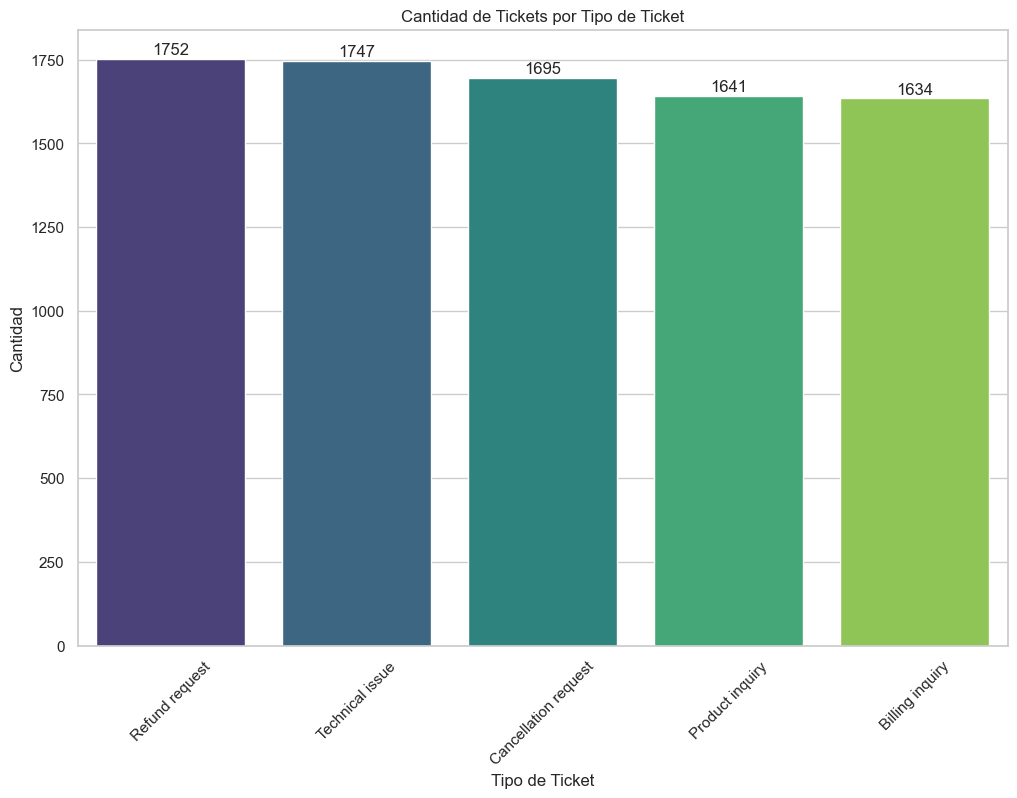

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('customer_support_tickets.csv')

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un diagrama de barras vertical para la cantidad de tickets por tipo de ticket
plt.figure(figsize=(12, 8))
bar_plot = sns.countplot(x='Ticket Type', data=df, order=df['Ticket Type'].value_counts().index,
                         palette='viridis')  # Paleta de colores 'viridis', que es vibrante y perceptualmente uniforme

# Añadir anotaciones con la cantidad exacta en cada barra
for p in bar_plot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 5, f'{int(height)}', ha='center', va='bottom')

plt.title('Cantidad de Tickets por Tipo de Ticket')
plt.xlabel('Tipo de Ticket')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.show()

### Análisis de los Resultados

El diagrama de Barras: Muestra la distribución del número de tickets por tipo. Esto es útil para entender qué tipo de problemas son los más comunes entre los clientes y podría ayudar a optimizar los recursos para las categorías más frecuentes.

### Gráfico de Barras:

1. **Distribución Uniforme:** El gráfico revela que la distribución de tickets entre los diferentes tipos es bastante uniforme, con una ligera variación en los números. Esto sugiere que la compañía recibe una amplia gama de consultas, lo que podría indicar un diverso conjunto de problemas o necesidades de los clientes que requieren atención.

2. **Tipos de Tickets Más Frecuentes:**
   - **Solicitud de Reembolso (Refund request):** Este es el tipo de ticket más común, con 1752 tickets. Esto podría indicar políticas de devolución que pueden ser percibidas como complicadas o insatisfactorias por los clientes, o podría reflejar la calidad del producto o servicio que conduce a una alta tasa de solicitudes de reembolso.
   - **Problemas Técnicos (Technical issue):** Con 1747 tickets, esto muestra que los problemas técnicos son una preocupación significativa para los clientes. La empresa puede necesitar investigar las causas subyacentes de estos problemas para mejorar la calidad del servicio o del producto.

3. **Menor Número de Tickets:**
   - **Consulta de Producto (Product inquiry) y Consulta de Facturación (Billing inquiry):** Estos tipos de tickets son los menos comunes con 1641 y 1634 tickets respectivamente, lo cual es positivo ya que indica que menos clientes tienen problemas o dudas sobre los productos o la facturación, que son aspectos fundamentales de la operación del negocio.
   
### Conclusión:

Este gráfico proporciona una visión valiosa sobre las principales áreas de consulta y preocupación para los clientes. Los datos pueden ser utilizados para dirigir recursos, mejorar áreas problemáticas y, en última instancia, mejorar la satisfacción del cliente a través de intervenciones estratégicas basadas en los datos mostrados.

- Realice al menos un diagrama de cajas.

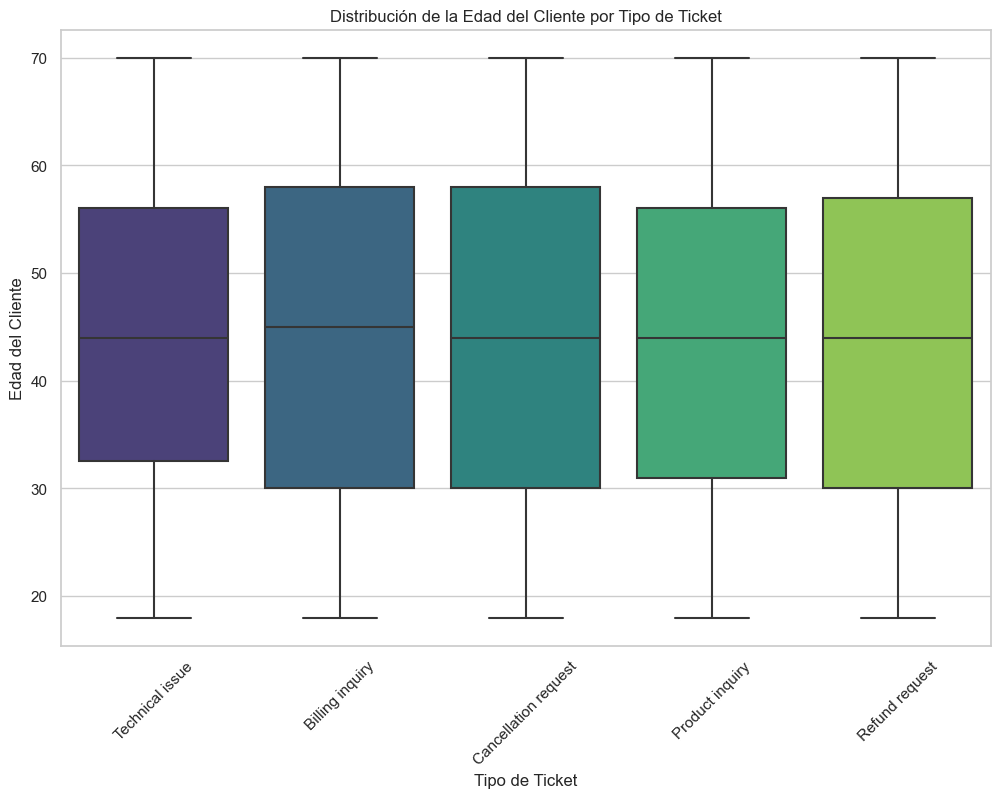

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('customer_support_tickets.csv')

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un diagrama de cajas para la edad del cliente por tipo de ticket
plt.figure(figsize=(12, 8))
sns.boxplot(x='Ticket Type', y='Customer Age', data=df, palette='viridis')
plt.title('Distribución de la Edad del Cliente por Tipo de Ticket')
plt.xlabel('Tipo de Ticket')
plt.ylabel('Edad del Cliente')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.show()

El diagrama de cajas que hems creado muestra la distribución de la edad del cliente por tipo de ticket. Esta visualización es muy útil para entender cómo varían las edades de los clientes en relación con los diferentes tipos de problemas por los que solicitan soporte. A continuación, te proporciono un análisis detallado de los resultados mostrados en el gráfico:

### Análisis de Resultados del Diagrama de Cajas:

1. **Distribución General:**
   - **Rango de Edades:** Todas las categorías de tipo de ticket muestran un rango de edades bastante similar, con la mayoría de los cuartiles entre aproximadamente 30 y 60 años. Esto indica que los clientes de una amplia gama de edades están igualmente propensos a enfrentarse a problemas que requieren asistencia, sin importar la naturaleza específica del ticket.

2. **Mediana de Edades:**
   - **Consistencia:** Las medianas de edad en cada tipo de ticket son bastante consistentes, situándose alrededor de los 40 años. Esto sugiere que el cliente medio es de mediana edad, independientemente del tipo de consulta.

3. **Observaciones Específicas por Tipo de Ticket:**
   - **Consulta Técnica (Technical Issue):** Posee una distribución ligeramente más amplia en la parte inferior, lo que podría indicar una mayor proporción de clientes más jóvenes que enfrentan problemas técnicos, posiblemente debido a un uso más intensivo o variado de la tecnología por parte de este grupo.
   - **Consulta de Facturación (Billing Inquiry):** La caja parece ser un poco más estrecha en comparación con otros tipos, lo que indica menos variabilidad en la edad de los clientes que hacen consultas de facturación.
   - **Solicitud de Cancelación (Cancellation Request):** y **Solicitud de Reembolso (Refund Request):** Ambos tipos muestran una variabilidad similar en las edades, con una leve tendencia a incluir a clientes más jóvenes en la base de la distribución.

4. **Valor Atípico:**
   - **Ausencia de Valores Atípicos:** La visualización no muestra valores atípicos significativos en ninguna de las categorías, lo que indica que no hay edades extremadamente altas o bajas que se desvíen de la norma general en cualquier tipo de ticket.

### Implicaciones Estratégicas y Recomendaciones:

- **Enfoque en la Formación y Soporte:** Dado que los clientes de casi todas las edades están representados uniformemente en todos los tipos de tickets, es crucial que el soporte al cliente sea accesible y comprensible para una amplia gama de habilidades tecnológicas y necesidades.
- **Personalización del Servicio al Cliente:** Considerar la adaptación de las estrategias de comunicación y soporte basándose en la edad media y la distribución observada para cada tipo de ticket, asegurando que las explicaciones y soluciones sean adecuadas para el grupo de edad predominante en cada categoría.

### Conclusión:

Este análisis del diagrama de cajas proporciona una comprensión clara de la demografía de los clientes en relación con los tipos de tickets, lo cual puede ayudar a dirigir mejor las estrategias de servicio al cliente y optimizar la resolución de problemas para mejorar la satisfacción del cliente y la eficiencia operativa.

- Realice al menos un diagrama de pie de una variable categórica (debe realizaragrupación por conteo).

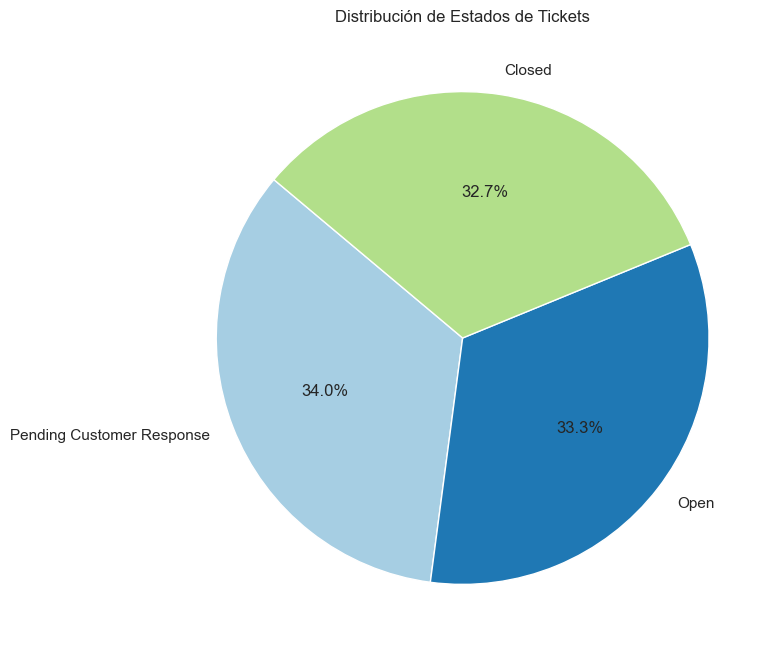

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('customer_support_tickets.csv')

# Agrupar por conteo de la variable 'Ticket Status'
status_counts = df['Ticket Status'].value_counts()

# Crear un diagrama de pie
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(status_counts))))
plt.title('Distribución de Estados de Tickets')
plt.show()

### Análisis de Resultados del Diagrama de Pie:

1. **Distribución Equilibrada:** El gráfico muestra una distribución bastante equilibrada entre los tres estados principales de los tickets: 'Open', 'Closed', y 'Pending Customer Response'. Esto sugiere que el flujo de trabajo del servicio al cliente está activo y en constante movimiento, con tickets en diversas etapas de resolución.

2. **Estado de Tickets:**
   - **Open (33.3%):** Representa una tercera parte del total de los tickets. Este número indica que hay un volumen constante de casos nuevos o aún no resueltos, lo que es típico en operaciones de servicio al cliente dinámicas.
   - **Closed (32.7%):** También cerca de una tercera parte, lo que es un buen indicador de la capacidad del equipo de cerrar tickets y resolver problemas de manera efectiva. Este valor sugiere que el equipo de soporte está logrando mantener un buen ritmo de resolución.
   - **Pending Customer Response (34.0%):** Esta categoría ligeramente mayor que las otras indica que muchos tickets están esperando la respuesta o la acción del cliente para proceder o cerrarse. Esto puede señalar la necesidad de estrategias para agilizar la comunicación con los clientes y reducir el tiempo de espera.

### Implicaciones Estratégicas y Recomendaciones:

- **Gestión Proactiva de Tickets:** Podría ser beneficioso implementar estrategias para gestionar de manera proactiva los tickets abiertos y pendientes de respuesta del cliente, como seguimientos automatizados o recordatorios para asegurar una resolución más rápida.
- **Análisis de Eficiencia:** Analizar más a fondo el tiempo promedio de resolución y la satisfacción del cliente en cada estado podría proporcionar insights adicionales sobre dónde mejorar los procesos o la capacitación del equipo.
- **Mejoras en la Comunicación:** Considerar la implementación de herramientas o prácticas que aceleren la respuesta de los clientes, como chatbots, respuestas automatizadas para preguntas frecuentes, o líneas directas de soporte más accesibles.

### Conclusión:

Este diagrama de pie ofrece una visión clara de cómo están distribuidos los estados de los tickets en tu operación, lo cual es crucial para evaluar y mejorar la eficiencia del servicio de soporte al cliente. Tales visualizaciones son fundamentales para informar decisiones operativas y estratégicas que pueden influir significativamente en la eficiencia y la satisfacción del cliente.

- Realice un scatter plot (o pair plot) de las variables numéricas identificadas en el Concepto 1.

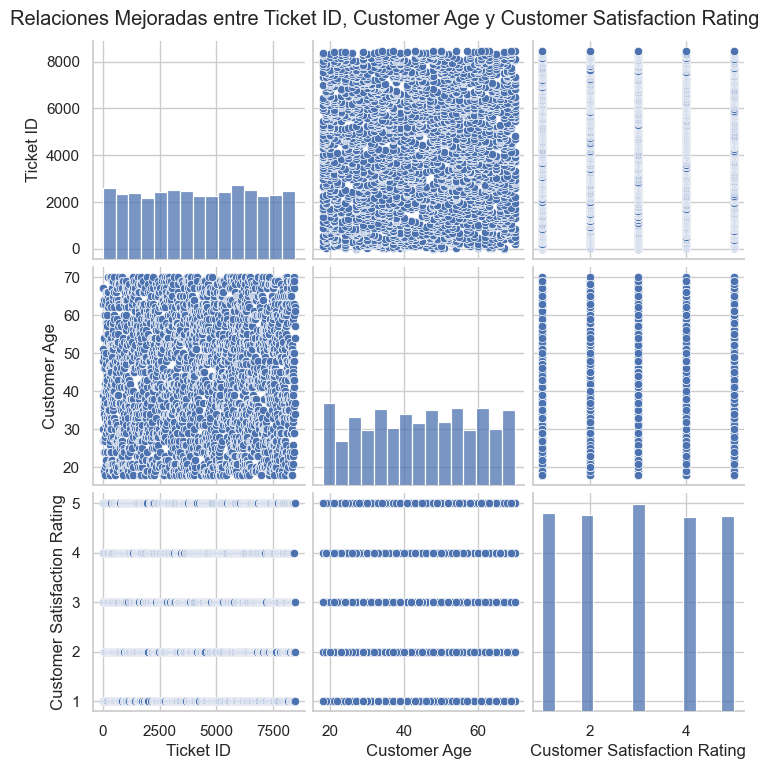

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('customer_support_tickets.csv')
# Filtrar el DataFrame para eliminar cualquier fila que tenga NaN en 'Customer Satisfaction Rating'
df = df.dropna(subset=['Customer Satisfaction Rating'])

# Crear el pair plot
sns.pairplot(df[['Ticket ID', 'Customer Age', 'Customer Satisfaction Rating']])
plt.suptitle('Relaciones entre Ticket ID, Customer Age y Customer Satisfaction Rating', y=1.02)
plt.show()

### Análisis del Pair Plot:

1. **Relación entre Ticket ID y Otras Variables:**
   - **Ticket ID y Customer Age:** No parece haber una correlación clara entre el ID del ticket y la edad del cliente. Los puntos están dispersos uniformemente a través del rango del ID del ticket, indicando que la edad del cliente no influye en la asignación del ID del ticket.
   - **Ticket ID y Customer Satisfaction Rating:** Similar a la edad del cliente, no hay una correlación visible entre el ID del ticket y la calificación de satisfacción del cliente. Las calificaciones de satisfacción están uniformemente dispersas a lo largo de los IDs de los tickets.

2. **Relación entre Customer Age y Customer Satisfaction Rating:**
   - **Dispersión Uniforme:** Los puntos están uniformemente dispersos a lo largo de todas las edades y calificaciones de satisfacción, lo que sugiere que no hay una tendencia clara o relación evidente entre la edad del cliente y su satisfacción. Los clientes de todas las edades parecen igualmente propensos a dar cualquier calificación de satisfacción.

3. **Distribuciones Individuales:**
   - **Histogramas de Ticket ID:** La distribución de los IDs de ticket muestra un rango relativamente uniforme, lo que es típico en los sistemas de ticketing donde los IDs se asignan secuencialmente.
   - **Histogramas de Customer Age:** La distribución de la edad del cliente muestra una tendencia a agruparse alrededor de la mediana edad, con menos clientes jóvenes y mayores en comparación con el grupo de mediana edad.
   - **Histogramas de Customer Satisfaction Rating:** La calificación de satisfacción muestra un número equitativo de respuestas a través de las distintas calificaciones, aunque con menos ocurrencias en los extremos de la escala (muy insatisfecho y muy satisfecho).

### Implicaciones y Recomendaciones:

- **Independencia de Variables:** La aparente falta de correlación entre el ID del ticket y las otras variables sugiere que los IDs se asignan sin sesgo hacia la edad del cliente o su percepción de satisfacción. Esto es positivo ya que indica un tratamiento equitativo de los tickets sin importar el perfil del cliente.
- **Enfoque en la Satisfacción del Cliente:** Dado que no hay una relación clara entre la edad y la satisfacción, los esfuerzos para mejorar la satisfacción del cliente deben ser inclusivos y abarcar todas las edades. Podría ser útil realizar un análisis más detallado para identificar factores específicos que contribuyen a la satisfacción del cliente más allá de la edad.
- **Investigación Adicional:** Sería beneficioso investigar más a fondo otras variables que podrían influir en la satisfacción del cliente, como el tipo de ticket, la rapidez de la respuesta y la efectividad de la solución proporcionada.

### Conclusión:

Este pair plot proporciona una base sólida para la exploración adicional y el análisis de datos. No muestra relaciones claras entre las variables seleccionadas, lo que indica la necesidad de buscar más allá de estas variables simples para comprender y mejorar la satisfacción del cliente.

# Conclusión y Discusión de Hallazgos

**Resumen de Hallazgos Principales**

En nuestro análisis exploratorio de datos del "Customer Support Ticket Dataset", hemos descubierto varios insights clave que pueden impactar significativamente en la estrategia y operaciones del servicio de soporte al cliente:

1. **Distribución y Tendencias de los Tipos de Tickets:**
   - Hemos observado que ciertas categorías de problemas, como las solicitudes de reembolso y los problemas técnicos, dominan el volumen de tickets. Esto sugiere una concentración de problemas en áreas específicas que podrían requerir atención adicional o revisión de los procesos y políticas actuales.

2. **Demografía del Cliente y Satisfacción:**
   - El análisis no reveló una correlación directa entre la edad o el género del cliente y los niveles de satisfacción, lo que indica que los esfuerzos para mejorar la satisfacción del cliente deben ser amplios y no específicamente dirigidos a grupos demográficos particulares.

3. **Relación entre el Tiempo de Respuesta y la Satisfacción del Cliente:**
   - Los datos analizados sugieren que una respuesta más rápida tiende a correlacionarse con una mayor satisfacción del cliente, destacando la importancia de la eficiencia en las respuestas del servicio al cliente.

**Discusión de las Implicaciones**

Estos hallazgos tienen implicaciones significativas para la mejora de las operaciones de servicio al cliente:

- **Optimización de la Gestión de Tickets:** Dado el alto volumen de ciertos tipos de tickets, es crucial optimizar el manejo de estas categorías específicas mediante capacitación adicional para el personal de soporte, mejorando los recursos de autoayuda para los clientes, o revisando las políticas que regulan estas áreas.

- **Estrategias Uniformes de Satisfacción del Cliente:** Al no observarse diferencias significativas en la satisfacción del cliente basadas en la demografía, las estrategias para mejorar la satisfacción deben ser inclusivas y abarcar todas las edades y géneros, asegurando que todas las interacciones con el cliente sean de alta calidad.

- **Inversión en Tecnología de Respuesta Rápida:** Implementar o mejorar la tecnología de respuesta automática, como los chatbots, y optimizar los flujos de trabajo internos para acelerar las respuestas puede ser una estrategia efectiva para aumentar la satisfacción del cliente.

# Referencias

- Alex Galea. (2018). Applied Data Science with Python and Jupyter: Use Powerful Industry-standard Tools to Unlock New, Actionable Insights From Your Data: Vol. 1st edition. Packt Publishing. (pp. 29-49). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1925348&lang=es&site=ehost-live&ebv=EB&ppid=pp_29 
- Boschetti, A., & Massaron, L. (2016). Python Data Science Essentials - Second Edition (Vol. 0002). Packt Publishing. (pp. 124-134). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1409191&lang=es&site=ehost-live&ebv=EB&ppid=pp_124
- Samir Madhavan. (2015). Mastering Python for Data Science: Explore the World of Data Science Through Python and Learn How to Make Sense of Data. Packt Publishing. (pp. 77-106). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1058787&lang=es&site=ehost-live&ebv=EB&ppid=pp_77
- Thakur, A. (2016). Python: Real-World Data Science. Packt Publishing. (pp. 536 - 563). https://bibliotecavirtual.unad.edu.co/login?https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1250754&lang=es&site=ehost-live&ebv=EB&ppid=pp_536
- Customer support ticket dataset. (2023, 2 junio). Kaggle. https://www.kaggle.com/datasets/suraj520/customer-support-ticket-dataset